# Phileo Bench Training Script Demo

In [24]:
import torch
import gc

import training_script
from utils.training_utils import read_yaml

torch.cuda.set_device(0)

In [4]:
# Read in defualt arguments
args = read_yaml('default_args.yml')
args

{'experiment_name': 'jupiter_notebook',
 'model_name': 'core_unet_nano',
 'lr': 0.0001,
 'lr_scheduler': 'reduce_on_plateau',
 'batch_size': 64,
 'epochs': 500,
 'vis_val': True,
 'downstream_task': 'lc',
 'input_channels': 10,
 'input_size': 128,
 'output_channels': 11,
 'regions': None,
 'n_shot': 50,
 'split_ratio': None,
 'augmentations': True,
 'early_stop': 15,
 'warmup': True,
 'device': 'cuda',
 'num_workers': 24,
 'pretrained_model_path': None,
 'freeze_pretrained': None,
 'data_path_128_10m': '/home/phimultigpu/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/',
 'data_path_224_10m': '/home/phimultigpu/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np_224/',
 'data_path_224_30m': '/home/phimultigpu/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np_HLS/',
 'data_parallel': False}

The defualt arguments setup the following experiment:
Training a UNET model on the landcover segmentation task for 500 epochs with a learning rate of 0.0001 with a linear warmup and reduction on plateau.
Data protocol: 50 samples from each region 
Training device: cuda gpu

### Lets Train!

In [5]:
# reduce training epochs for demo 
args['epochs'] = 25
training_script.main(**vars(args))

DEVICE cuda
Showing up to 5 missing files: ['/home/phimultigpu/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/south-america_6_train_label_lc.npy', '/home/phimultigpu/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/south-america_73_train_label_lc.npy', '/home/phimultigpu/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/south-america_74_train_label_lc.npy']
Loading predefined train/val selection
0 europe
1 east-africa
2 northwest-africa
3 north-america
4 south-america
Showing up to 5 missing files: ['/home/phimultigpu/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/south-america_6_train_label_lc.npy', '/home/phimultigpu/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/south-america_73_train_label_lc.npy', '/home/phimultigpu/phileo_NFS/phileo_data/downstream/downstream_dataset_patches_np/south-america_74_train_label_lc.npy']
Showing up to 5 missing files: ['/home/phimultigpu/phileo_NFS/phileo_data/downstream/do

Epoch 1/25: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it, val_loss=2.3887, lr=1e-9]
/home/phimultigpu/miniconda3/envs/phileo-test-bed/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
Epoch 5/25: 100%|██████████| 1/1 [00:02<00:00,  2.50s/it, val_loss=2.3505, lr=1e-5]


Warmup finished


Epoch 25/25: 100%|██████████| 1/1 [00:03<00:00,  3.33s/it, val_loss=1.1807, lr=0.0001]


Finished Training. Best epoch:  24

Starting Testing...


Test Set: 100%|██████████| 1447/1447 [16:01<00:00,  1.51it/s]


Test Loss: {'acc': 0.47310447676387224, 'precision_per_class': [0.5746655784719001, 0.2893534450268714, 0.3268251116072105, 0.37034874213777663, 0.4273382465936208, 0.44527283716111205, 0.0, 0.9010801793943831, 0.2634920634920635, 0.011148421759570181, 0.11645431206617857], 'recall_per_class': [0.6335708186489544, 0.02746773568579123, 0.5438555855557432, 0.29681593390386557, 0.36146524630077076, 0.08171076104664605, 0.0, 0.9243039897500999, 3.7594402148225668e-06, 9.709649314957919e-05, 0.013682398181712898], 'precision_micro': 0.47310447676387224, 'precision_macro': 0.33872535797369885, 'recall_micro': 0.47310447676387224, 'recall_macro': 0.26208848409154073, 'conf_mat': [[256243709.0, 4018314.0, 117565588.0, 15483346.0, 6484157.0, 307373.0, 107.0, 4304884.0, 40.0, 16841.0, 19314.0], [27393634.0, 4928982.0, 107276741.0, 36659540.0, 2629559.0, 132976.0, 39.0, 422350.0, 4.0, 2121.0, 298.0], [83961572.0, 4291097.0, 196782640.0, 60231567.0, 8620865.0, 1075641.0, 78.0, 6488133.0, 41.0, 154

### Now lets try finetuning Prithvi. 

n.b. Prithvi is trained on 30m resolution 224x224 patches. This switch of dataset is handled intrenally in the code

In [23]:
# set appropriate arguments
args['model_name'] = 'prithvi'
args['pretrained_model_path'] = '/home/phimultigpu/phileo_NFS/phileo_data/pretrained_models/Prithvi_100M.pt'
args['freeze_pretrained'] = False # for linear probing set to True

In [22]:
training_script.main(**vars(args))

DEVICE cuda
prithvi
_IncompatibleKeys(missing_keys=['pos_embed', 'decoder_head.decoder_blocks.0.match_channels.squeeze.excitation.0.weight', 'decoder_head.decoder_blocks.0.match_channels.squeeze.excitation.2.weight', 'decoder_head.decoder_blocks.0.match_channels.match_channels.0.weight', 'decoder_head.decoder_blocks.0.match_channels.match_channels.1.weight', 'decoder_head.decoder_blocks.0.match_channels.match_channels.1.bias', 'decoder_head.decoder_blocks.0.match_channels.match_channels.1.running_mean', 'decoder_head.decoder_blocks.0.match_channels.match_channels.1.running_var', 'decoder_head.decoder_blocks.0.match_channels.conv1.weight', 'decoder_head.decoder_blocks.0.match_channels.conv1.bias', 'decoder_head.decoder_blocks.0.match_channels.norm1.weight', 'decoder_head.decoder_blocks.0.match_channels.norm1.bias', 'decoder_head.decoder_blocks.0.match_channels.norm1.running_mean', 'decoder_head.decoder_blocks.0.match_channels.norm1.running_var', 'decoder_head.decoder_blocks.0.match_chan

Epoch 5/25: 100%|██████████| 2/2 [00:03<00:00,  1.77s/it, val_loss=2.5761, lr=1e-5]


Warmup finished


Epoch 25/25: 100%|██████████| 2/2 [00:03<00:00,  1.79s/it, val_loss=1.2340, lr=0.0001]


Finished Training. Best epoch:  25

Starting Testing...


Test Set: 100%|██████████| 111/111 [01:06<00:00,  1.67it/s]
/home/phimultigpu/code/phileo-bench/utils/training_loops.py:629: RuntimeWarning: invalid value encountered in divide
  precision_per_class = tp_per_class/(fp_per_class+tp_per_class)


Test Loss: {'acc': 0.45410157945676144, 'precision_per_class': [0.48220042584232736, 0.28741726744847795, 0.3138857423346023, 0.3853154607405942, 0.3849004221907905, 0.5737776443362647, nan, 0.8773984625611694, 0.011560693641618497, 0.0, 0.039384615384615386], 'recall_per_class': [0.6740605256176482, 0.20748585618727686, 0.2531269284992573, 0.3750258906652062, 0.4081740808066843, 0.5282833082831043, 0.0, 0.8919296181564914, 7.28104884964889e-07, 0.0, 0.0001266351266054465], 'precision_micro': 0.45410157945676144, 'precision_macro': nan, 'recall_micro': 0.45410157945676144, 'recall_macro': 0.30347396104065083, 'conf_mat': [[31279898.0, 4180957.0, 6860755.0, 2308982.0, 1173767.0, 88289.0, 0.0, 512047.0, 17.0, 0.0, 465.0], [5341222.0, 4429157.0, 5577010.0, 5381476.0, 433326.0, 121122.0, 0.0, 63456.0, 21.0, 0.0, 0.0], [14673451.0, 3530399.0, 10571023.0, 10282599.0, 1391481.0, 630389.0, 0.0, 681633.0, 43.0, 1.0, 729.0], [8275802.0, 2763035.0, 8384920.0, 12466140.0, 903078.0, 300801.0, 0.0, 

### Lets visulize some training artifacts

In [25]:
# Lets look at the infomation saved by the training script 
# this json file contains model and training info as well as test results.

import json
 
# Opening JSON file
f = open('/home/phimultigpu/phileo_NFS/phileo_data/experiments/jupiter_notebook/lc/16012024_Prithvi_unfrozen_lc_reduce_on_plateau_50/artifacts.json')
 
# returns JSON object as 
# a dictionary
data = json.load(f)
data

{'training_parameters': {'model': 'Prithvi_unfrozen',
  'lr': 0.0001,
  'scheduler': 'reduce_on_plateau',
  'warm_up': True,
  'optimizer': 'AdamW',
  'device': 'cuda',
  'training_epochs': 25,
  'early_stop': 15,
  'train_samples': 320,
  'val_samples': 64,
  'test_samples': 3552,
  'n_shot': 50,
  'p_split': None},
 'training_info': {'best_val_loss': 1.234041154384613,
  'best_epoch': 24,
  'last_epoch': None},
 'test_metrics': {'acc': 0.45410157945676144,
  'precision_per_class': [0.48220042584232736,
   0.28741726744847795,
   0.3138857423346023,
   0.3853154607405942,
   0.3849004221907905,
   0.5737776443362647,
   nan,
   0.8773984625611694,
   0.011560693641618497,
   0.0,
   0.039384615384615386],
  'recall_per_class': [0.6740605256176482,
   0.20748585618727686,
   0.2531269284992573,
   0.3750258906652062,
   0.4081740808066843,
   0.5282833082831043,
   0.0,
   0.8919296181564914,
   7.28104884964889e-07,
   0.0,
   0.0001266351266054465],
  'precision_micro': 0.45410157945

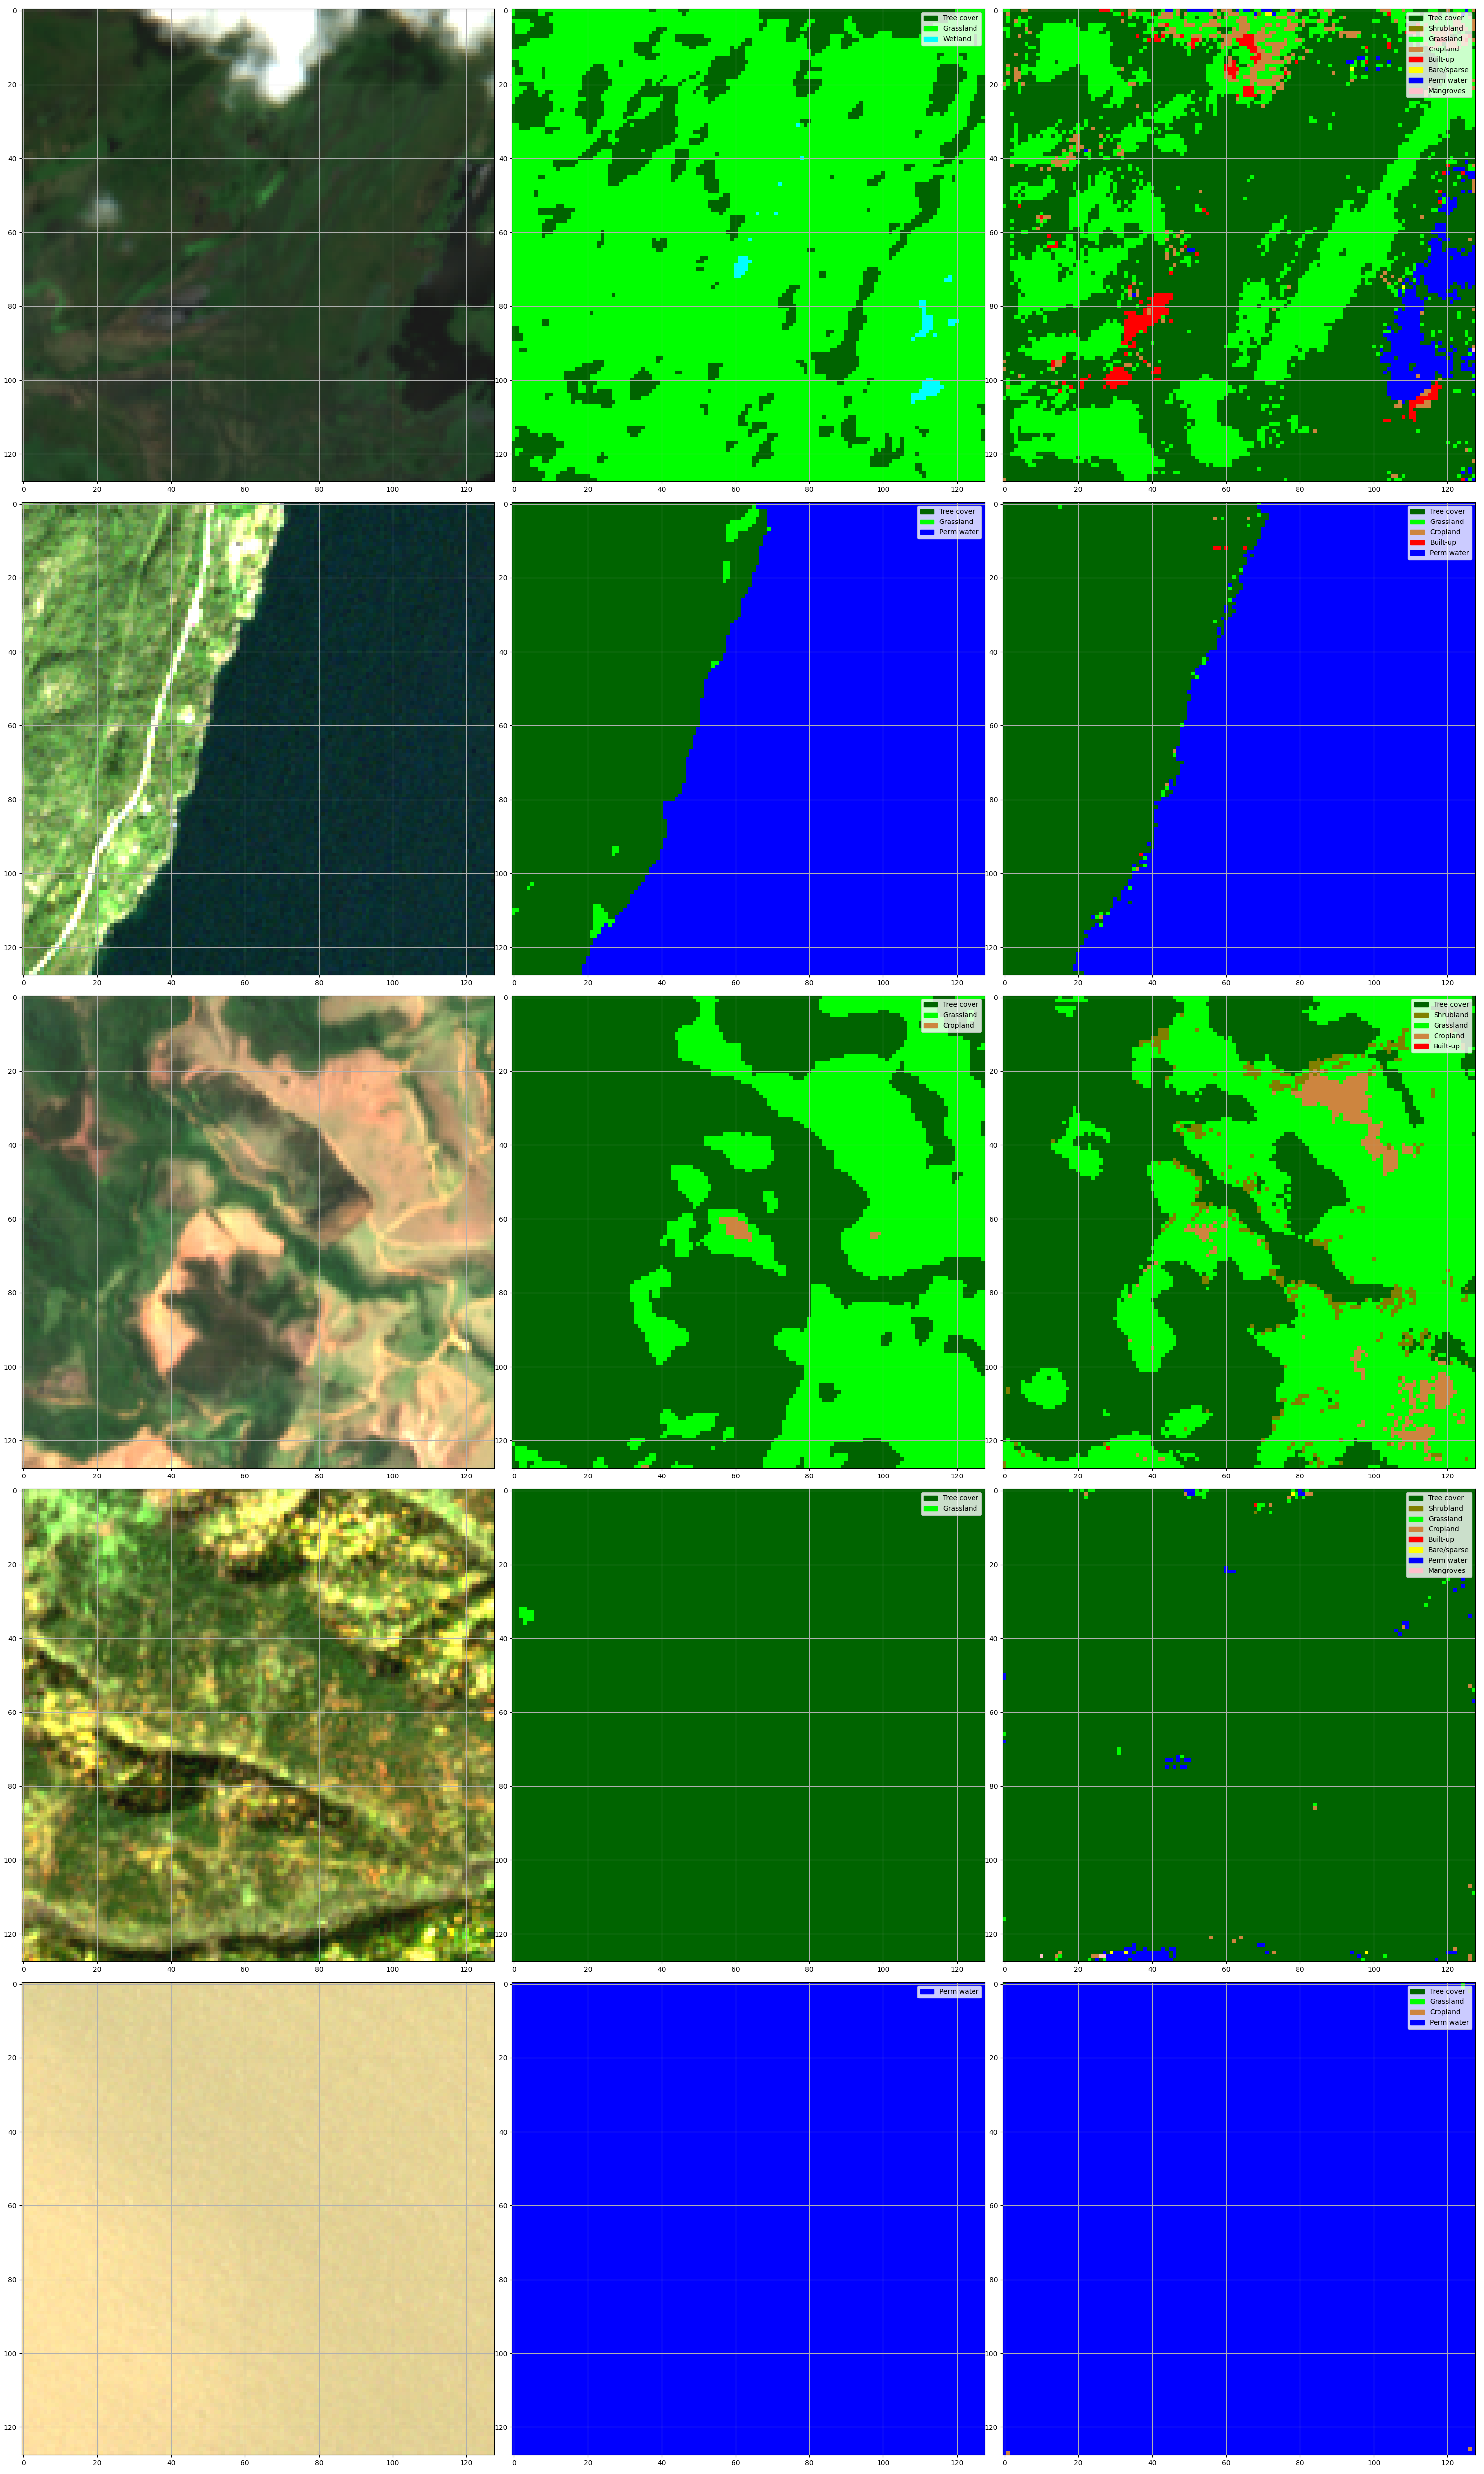

In [29]:
# Now lets look at some test images 
from IPython.display import Image
Image('/home/phimultigpu/phileo_NFS/phileo_data/experiments/jupiter_notebook/lc/16012024_CoreUnet_lc_reduce_on_plateau_50/val_images/val_24.png')

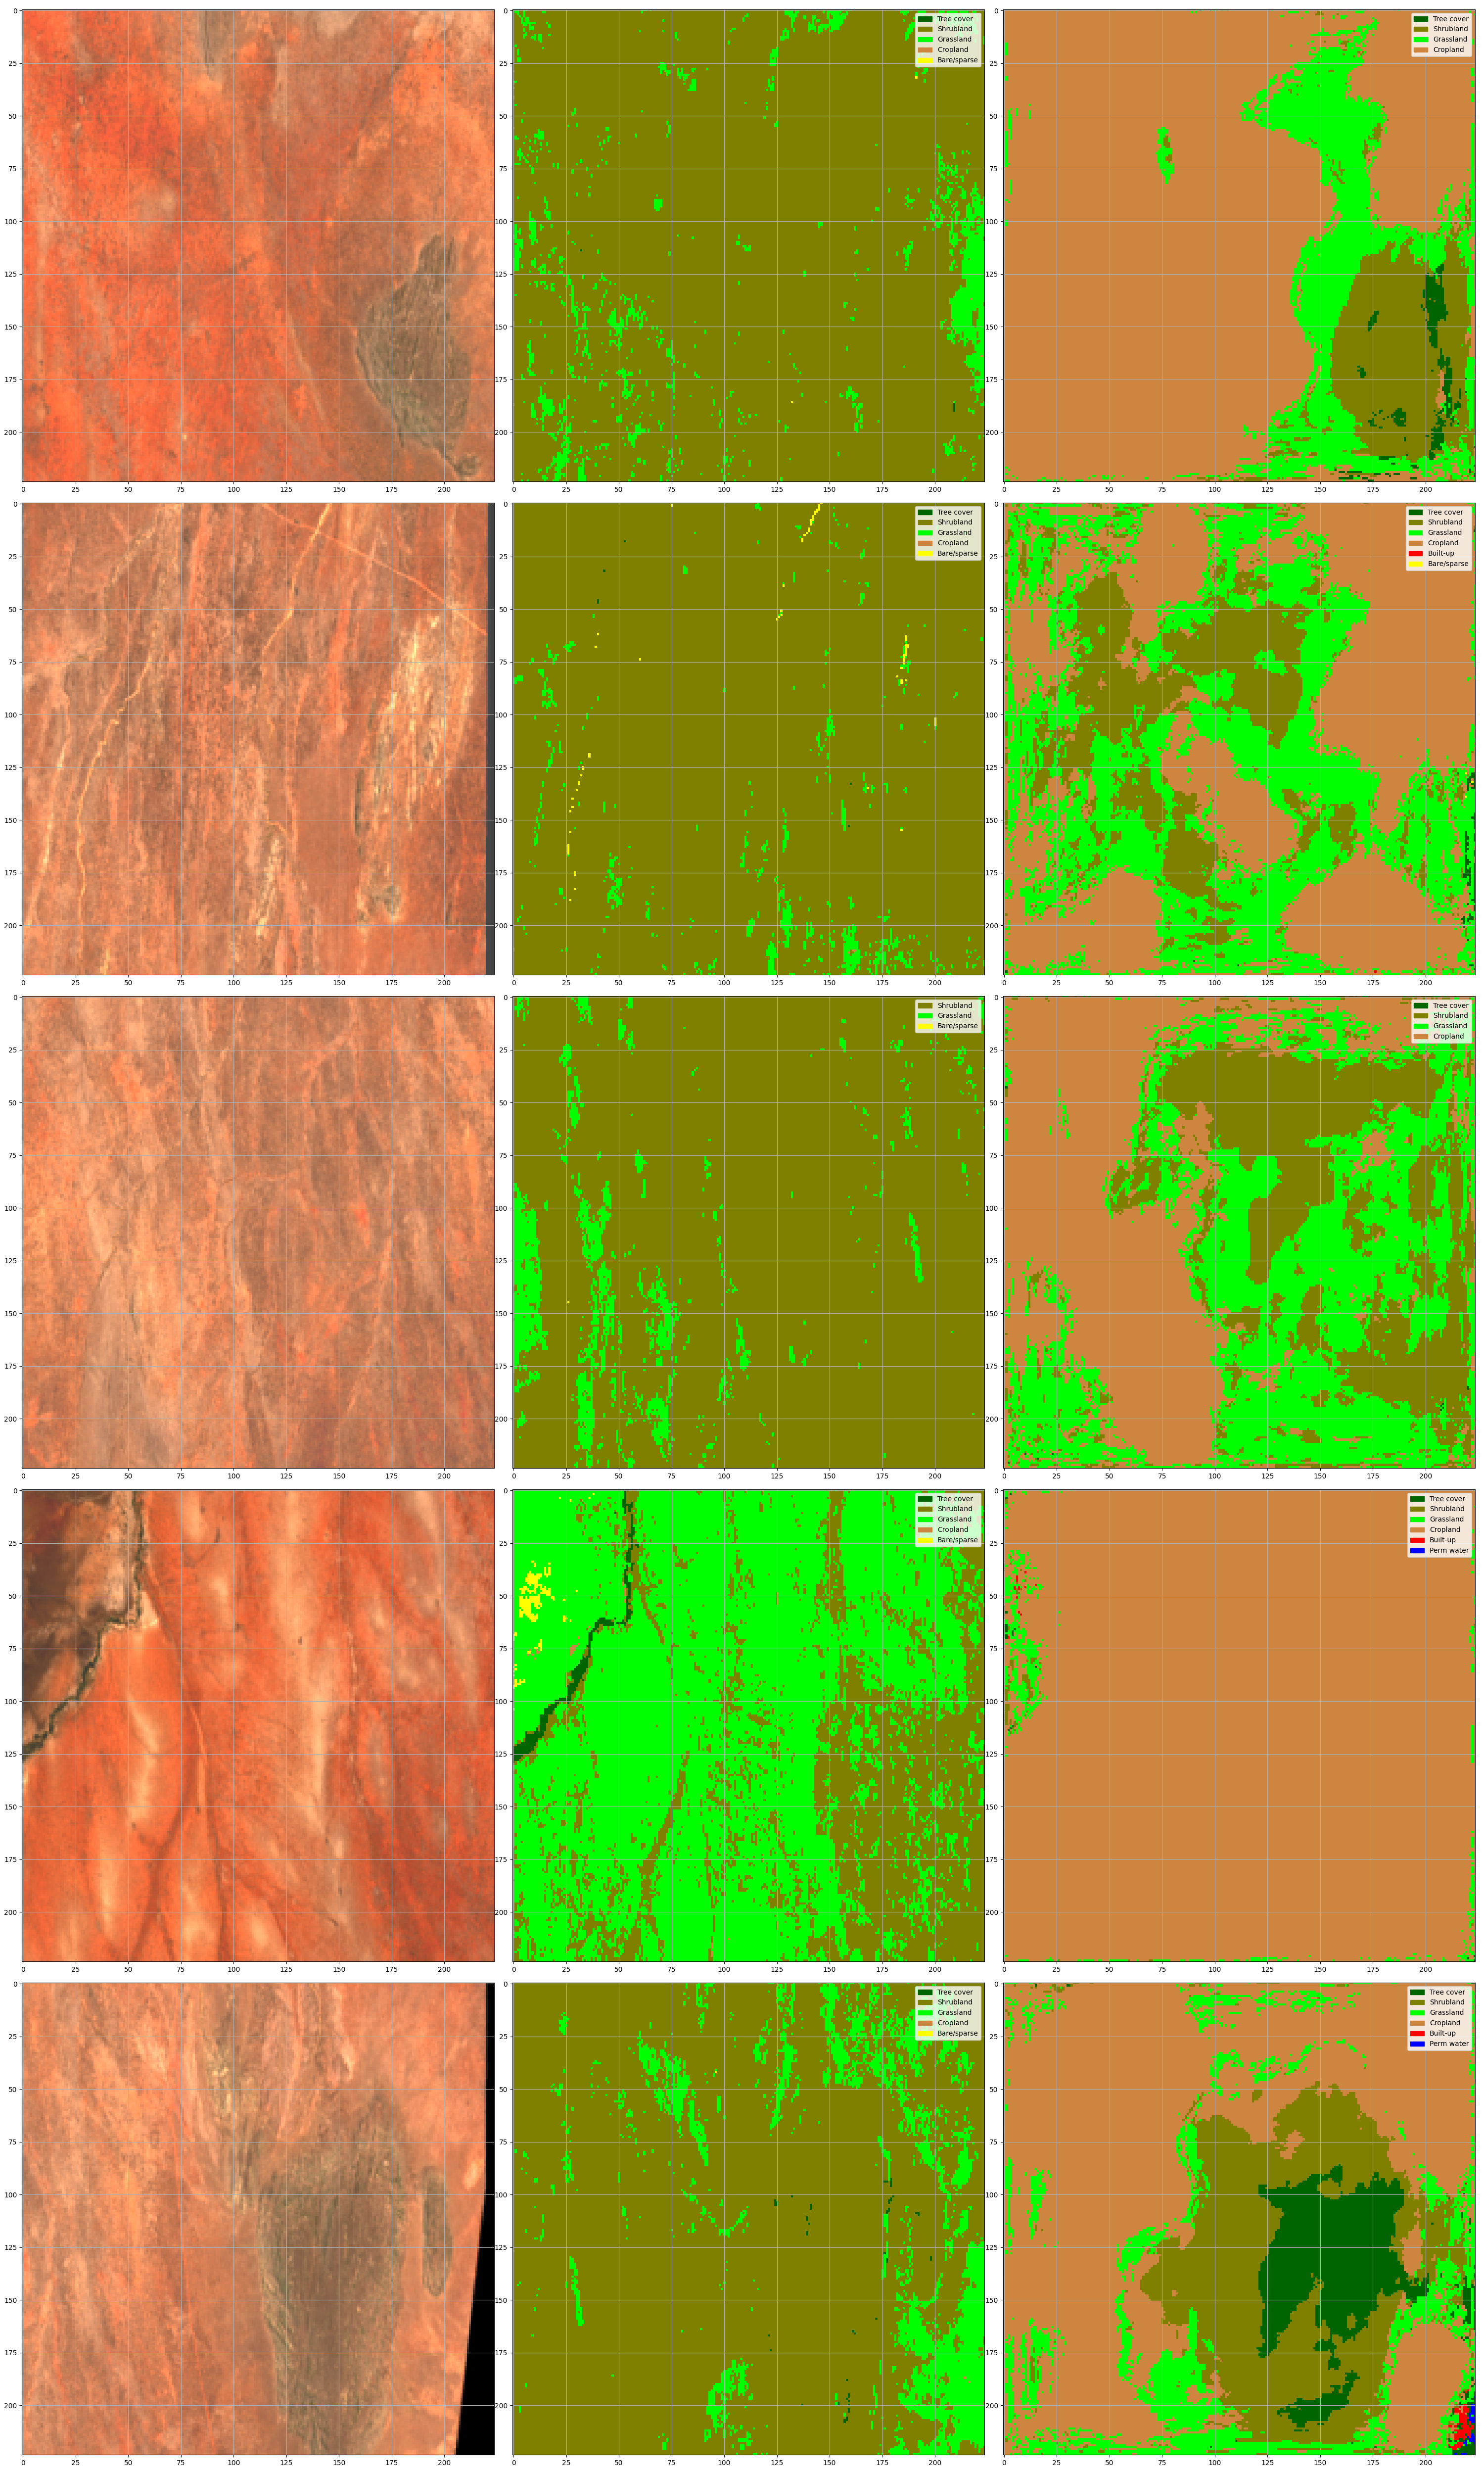

In [30]:
from IPython.display import Image
Image('/home/phimultigpu/phileo_NFS/phileo_data/experiments/jupiter_notebook/lc/16012024_Prithvi_unfrozen_lc_reduce_on_plateau_50/test.png')